In [2]:
from keras.datasets import imdb
import numpy as np

In [3]:
#Loading training and testing data
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
train_data[0:]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
#decoding a review
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
#Processing the input integer arrays as one hot tensors
def vectorize_sequences(data,words=10000):
  result = np.zeros((len(data),words))
  for i,j in enumerate(data):
    result[i,j] = 1
  return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
#Building and compiling the model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer= 'rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [9]:
#Training the model
valid_train = x_train[:10000]
valid_labels = y_train[:10000]
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(valid_train,valid_labels))

Epoch 1/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0623 - accuracy: 0.9823 - val_loss: 0.4064 - val_accuracy: 0.8753
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0476 - accuracy: 0.9885 - val_loss: 0.4414 - val_accuracy: 0.8658
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0434 - accuracy: 0.9885 - val_loss: 0.4358 - val_accuracy: 0.8748
Epoch 4/20
30/30 [==============================] - 1s 50ms/step - loss: 0.0318 - accuracy: 0.9933 - val_loss: 0.4638 - val_accuracy: 0.8713
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0282 - accuracy: 0.9937 - val_loss: 0.5003 - val_accuracy: 0.8681
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0211 - accuracy: 0.9968 - val_loss: 0.5280 - val_accuracy: 0.8702
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0190 - accuracy: 0.9971 - val_loss: 0.5571 - val_accuracy: 0.8675
Epoch 8/20
30

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

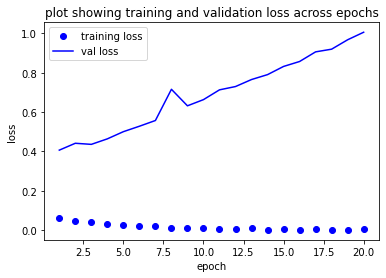

In [14]:
#Plotting training and validation loss
import matplotlib.pyplot as plt

train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(history_dict['accuracy'])+1)

plt.plot(epochs,train_loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='val loss')
plt.title('plot showing training and validation loss across epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


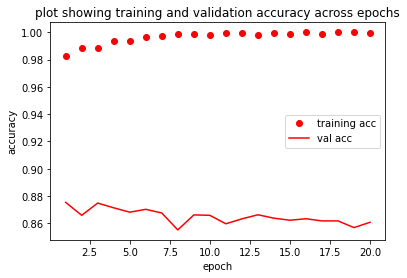

In [25]:
#Plotting training and validation accuracy
import matplotlib.pyplot as plt

train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(history_dict['accuracy'])+1)

plt.plot(epochs,train_acc,'ro',label='training acc')
plt.plot(epochs,val_acc,'r',label='val acc')
plt.title('plot showing training and validation accuracy across epochs')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [18]:
#Retraining the model for just 3 epochs - gives best accuracy (see plot above)
model = models.Sequential()
model.add(layers.Dense(10,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(partial_x_train,partial_y_train,epochs=3,batch_size=512,validation_data=(valid_train,valid_labels))

Epoch 1/3
30/30 [==============================] - 2s 58ms/step - loss: 0.5968 - accuracy: 0.7074 - val_loss: 0.4074 - val_accuracy: 0.8656
Epoch 2/3
30/30 [==============================] - 1s 36ms/step - loss: 0.3474 - accuracy: 0.8932 - val_loss: 0.3538 - val_accuracy: 0.8559
Epoch 3/3
30/30 [==============================] - 1s 36ms/step - loss: 0.2538 - accuracy: 0.9223 - val_loss: 0.2869 - val_accuracy: 0.8906


In [23]:
#Model evaluation on test data - accuracy = 0.88
result = model.evaluate(x_test,y_test)
result

782/782 [==============================] - 2s 2ms/step - loss: 0.3018 - accuracy: 0.8837


[0.3018239140510559, 0.8837199807167053]

In [24]:
#Predicting on test data
model.predict(x_test)

array([[0.37833813],
       [0.9956089 ],
       [0.7750057 ],
       ...,
       [0.144267  ],
       [0.2216506 ],
       [0.5411532 ]], dtype=float32)